<a href="https://colab.research.google.com/github/aghniyaaj/SistemPakar_CertaintyFactor_FuzzyLogic/blob/main/Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.0 MB/s eta 0:00:00


# FUZZY LOGIC

---


*   Ubah input_suhu jadi 22°C. Apa yang terjadi?

* Tambahkan variabel kelembaban dan buat aturan baru (contoh: jika panas DAN
lembab, kipas cepat) -> contoh ini tidak boleh digunakan

* Mengapa suhu 28°C memiliki nilai keanggotaan di "Nyaman" dan "Panas"?




Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: 30.83%


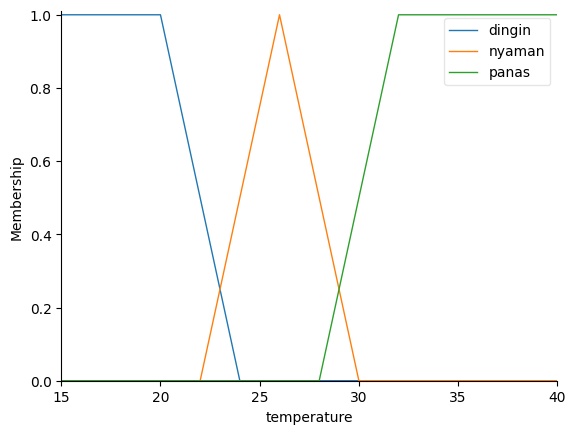

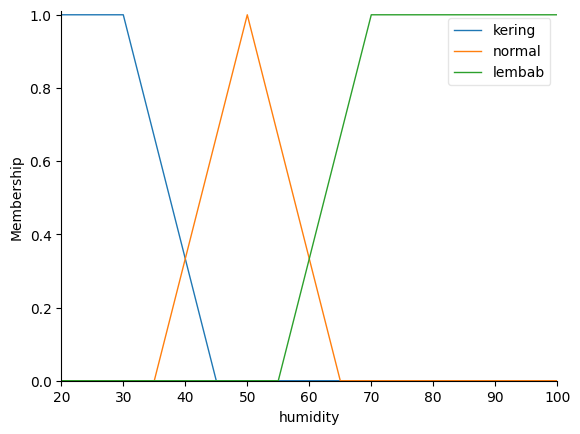

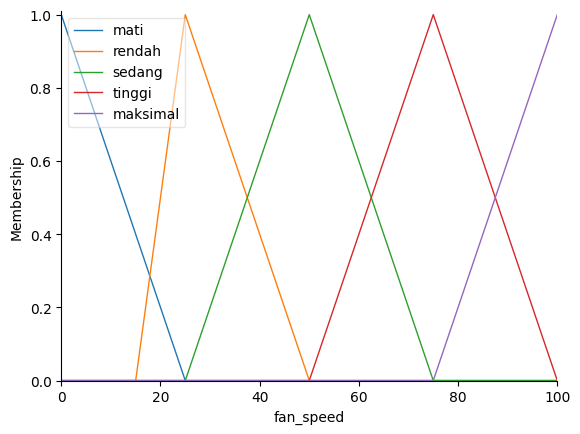

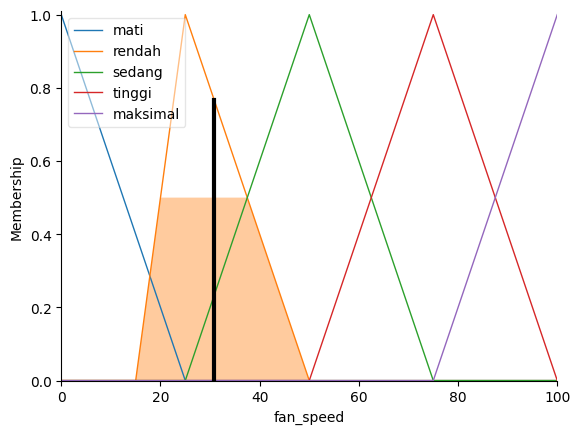

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variables
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(20, 101, 1), 'humidity')

# Output variable
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

# Membership functions for temperature
temperature['dingin'] = fuzz.trapmf(temperature.universe, [15, 15, 20, 24])
temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

# Membership functions for humidity
humidity['kering'] = fuzz.trapmf(humidity.universe, [20, 20, 30, 45])
humidity['normal'] = fuzz.trimf(humidity.universe, [35, 50, 65])
humidity['lembab'] = fuzz.trapmf(humidity.universe, [55, 70, 100, 100])

# Membership functions for fan speed
fan_speed['mati'] = fuzz.trimf(fan_speed.universe, [0, 0, 25])
fan_speed['rendah'] = fuzz.trimf(fan_speed.universe, [15, 25, 50])
fan_speed['sedang'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['tinggi'] = fuzz.trimf(fan_speed.universe, [50, 75, 100])
fan_speed['maksimal'] = fuzz.trimf(fan_speed.universe, [75, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
fan_speed.view()

# Define fuzzy rules
rule1 = ctrl.Rule(temperature['dingin'] & humidity['kering'], fan_speed['mati'])
rule2 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['mati'])
rule3 = ctrl.Rule(temperature['dingin'] & humidity['lembab'], fan_speed['rendah'])
rule4 = ctrl.Rule(temperature['nyaman'] & humidity['kering'], fan_speed['rendah'])
rule5 = ctrl.Rule(temperature['nyaman'] & humidity['normal'], fan_speed['sedang'])
rule6 = ctrl.Rule(temperature['nyaman'] & humidity['lembab'], fan_speed['tinggi'])
rule7 = ctrl.Rule(temperature['panas'] & humidity['kering'], fan_speed['sedang'])
rule8 = ctrl.Rule(temperature['panas'] & humidity['normal'], fan_speed['tinggi'])
rule9 = ctrl.Rule(temperature['panas'] & humidity['lembab'], fan_speed['maksimal'])

# tambahan aturan baru
rule10 = ctrl.Rule(temperature['dingin'] & humidity['normal'], fan_speed['rendah'])

# Create control system
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

# Input values
ac.input['temperature'] = 22
ac.input['humidity'] = 75

# Compute result
ac.compute()
print(f"Untuk suhu 22°C dan kelembaban 75%, kecepatan kipas AC: {ac.output['fan_speed']:.2f}%")

# Visualize result
fan_speed.view(sim=ac)
plt.show()


# PENJELASAN

---

1. Merubah Input suhu menjadi 22°C

Masuk ke dalam range "dingin" dan juga "nyaman" karena bentuk fungsi keanggotaannya overlapping.

Fungsi keanggotaan nyaman berbentuk segitiga dengan puncak di 26, jadi pada 22 nilainya tidak nol.

Sistem akan mengambil gabungan dari semua aturan yang aktif, lalu menggunakan metode defuzzifikasi untuk menentukan output fan speed.
Kalau kelembaban tetap 75% (lembab), maka aturan aktif:

* temperature['dingin'] & humidity['lembab'] → fan_speed['rendah']

* temperature['nyaman'] & humidity['lembab'] → fan_speed['tinggi']

Jadi hasilnya kemungkinan besar berada di antara rendah dan tinggi, yaitu sekitar sedang.

2. Menambah variabel kelembaban dan buat aturan baru

Jika suhu dingin dan kelembaban normal, maka fan_speed rendah

3. Suhu 28°C memiliki nilai keanggotaan di "Nyaman" dan "Panas"


Karena fungsi keanggotaan fuzzy overlap pada:

temperature['nyaman'] = fuzz.trimf(temperature.universe, [22, 26, 30])
temperature['panas'] = fuzz.trapmf(temperature.universe, [28, 32, 40, 40])

Maka pada suhu 28°C:
* Fungsi "nyaman" → masih memiliki nilai karena 28 berada di ekor kanan segitiga (22,26,30).

* Fungsi "panas" → juga sudah masuk di awal trapezium (28,32,40,40).

**Kesimpulan**
* Karena suhu diubah ke 22°C:
1. Keanggotaan dingin tinggi, nyaman juga sedikit aktif.

2. Dengan kelembaban 75% (lembab), dua aturan yang aktif adalah:

* dingin + lembab → rendah

* nyaman + lembab → tinggi
3.  Maka hasil akhir akan berada di antara fan_speed 'rendah' dan 'tinggi', tergantung seberapa kuat masing-masing keanggotaan.